# English Text Analysis with Markov Chains

This notebook visualizes the results of the Markov Chain analysis on *Alice's Adventures in Wonderland*.

## Objectives
1. Visualize Entropy Rate vs Model Order (k).
2. Compare entropy of Character-level vs Word-level models.
3. Compare Model Entropy with GZIP compression ratio.
4. Analyze entropy variations across chapters.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# Load metrics
df = pd.read_csv('results/metrics.csv')
df.head()

,level,keep_punct,order,h_model,h_seq,gzip_ratio
0,char,False,0,4.057418,4.057418,0.328255
1,char,False,1,3.226433,3.226433,0.328255
2,char,False,2,2.446010,2.446010,0.328255
3,char,False,3,1.827957,1.827957,0.328255
4,char,False,4,1.415392,1.415392,0.328255


## 1. Entropy Rate vs Model Order (Character Level)

We expect the entropy rate to decrease as the order $k$ increases, reflecting the dependencies in English text.

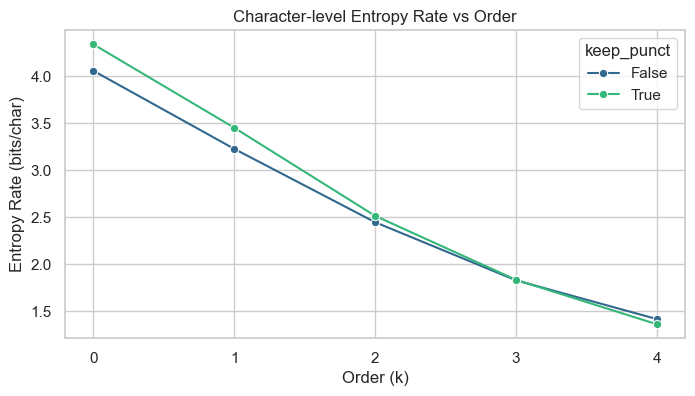

In [3]:
char_df = df[df['level'] == 'char']

plt.figure(figsize=(8, 4))
sns.lineplot(data=char_df, x='order', y='h_model', hue='keep_punct', marker='o', palette='viridis')
plt.title('Character-level Entropy Rate vs Order')
plt.xlabel('Order (k)')
plt.ylabel('Entropy Rate (bits/char)')
plt.xticks(char_df['order'].unique())
plt.grid(True)
plt.savefig('plots/char_entropy_vs_order.png')
plt.show()

## 2. Word Level Entropy

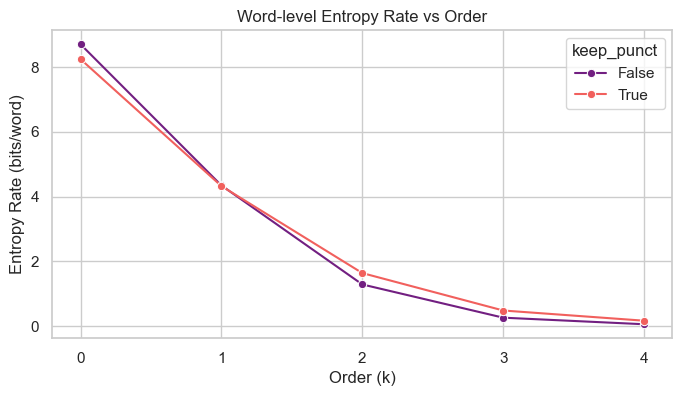

In [4]:
word_df = df[df['level'] == 'word']

plt.figure(figsize=(8, 4))
sns.lineplot(data=word_df, x='order', y='h_model', hue='keep_punct', marker='o', palette='magma')
plt.title('Word-level Entropy Rate vs Order')
plt.xlabel('Order (k)')
plt.ylabel('Entropy Rate (bits/word)')
plt.xticks(word_df['order'].unique())
plt.grid(True)
plt.savefig('plots/word_entropy_vs_order.png')
plt.show()

## 3. Entropy vs GZIP Ratio

We compare the estimated entropy rate (bits/symbol) with the compression ratio achieved by GZIP. Note that GZIP works on bytes, so the comparison is roughly against bits/character. For word models, the units differ significantly.

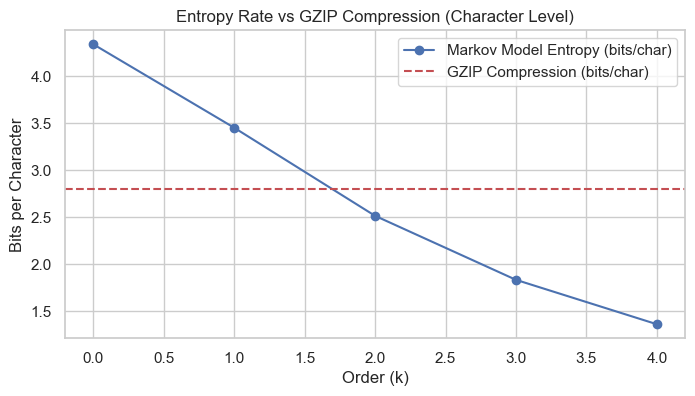

In [5]:
# Filter for Character level, Punctuation=True for best comparison
comp_df = df[(df['level'] == 'char') & (df['keep_punct'] == True)].copy()

# GZIP ratio is compressed_size / original_size. 
# In bits per character, this is roughly ratio * 8 (assuming 1 byte per char input).
comp_df['gzip_bits_per_char'] = comp_df['gzip_ratio'] * 8

plt.figure(figsize=(8, 4))
plt.plot(comp_df['order'], comp_df['h_model'], marker='o', label='Markov Model Entropy (bits/char)')
plt.axhline(y=comp_df['gzip_bits_per_char'].iloc[0], color='r', linestyle='--', label='GZIP Compression (bits/char)')

plt.title('Entropy Rate vs GZIP Compression (Character Level)')
plt.xlabel('Order (k)')
plt.ylabel('Bits per Character')
plt.legend()
plt.grid(True)
plt.savefig('plots/entropy_vs_gzip.png')
plt.show()

## 4. Entropy by Chapter

Analyzing how entropy varies across different chapters of the book.

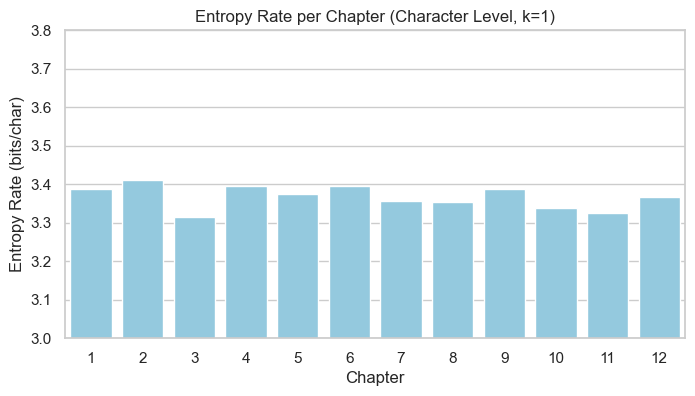

In [6]:
df_chap = pd.read_csv('results/chapter_entropy.csv')

plt.figure(figsize=(8, 4))
sns.barplot(data=df_chap, x='chapter', y='entropy', color='skyblue')
plt.title('Entropy Rate per Chapter (Character Level, k=1)')
plt.xlabel('Chapter')
plt.ylabel('Entropy Rate (bits/char)')
plt.ylim(3.0, 3.8) # Zoom in to see differences if small
plt.savefig('plots/chapter_entropy.png')
plt.show()

## 5. Generated Text Samples

Let's display some of the generated text samples.

In [7]:
with open('results/generated_samples.txt', 'r') as f:
    samples = f.read()

# Print first 1000 chars
print(samples[:2000])

--- Level: char, Punct: False, Order: 0 ---
 nncs oafa  s hiw dhwdnaeahtuf haideflfs t v ieiasi hd ali sbnrtslssr  kwfhdiia dtyo   nosoe  h an  iieare  h ilfly l oo nd o twxai  leeip r rtns astase nneeeiuhniifq tsyharghtltfymnkuet tr ttb t yr a

--- Level: char, Punct: False, Order: 1 ---
ate ysne as nd chiclangod mo rrer shinido n ar t len s anowoupyot r nd wen tenere ins terayerureacomokixpond rsestofi santhe ju gherouthe inghad tupo s ghi wh the t tr s herlincaise ieg s rdid tshensof

--- Level: char, Punct: False, Order: 2 ---
gforyphould lit isher for to the se of threepeal he cousenchou ke mark there it alselself wed the the sh sheriethey sing oreme begaid if a cre why quithe crome the ort of ful off to up a lown what wed v

--- Level: char, Punct: False, Order: 3 ---
o me more queen head if you not at as she word his it nothe said the the can the madedly you cook ture here thatter dormoutoff anxiouse doubtful zigzag willar and one enought to get minings despeaking ab

--- Level: